In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import os
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  StandardScaler
from tensorflow import keras

In [2]:
loan_data = pd.read_csv("loan_approval_dataset.csv")
loan_data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [3]:
lable_encoder_y = preprocessing.LabelEncoder()

loan_data[" education"] = lable_encoder_y.fit_transform(loan_data[" education"])
loan_data[" self_employed"] = lable_encoder_y.fit_transform(loan_data[" self_employed"])
loan_data[" loan_status"] = lable_encoder_y.fit_transform(loan_data[" loan_status"])
loan_data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,2,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,4,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1


In [4]:
np_loan = loan_data.to_numpy()
X_data = np_loan[:,1:12]
Y_data = np_loan[:,12]
print(X_data)
print(Y_data)

[[       2        0        0 ... 17600000 22700000  8000000]
 [       0        1        1 ...  2200000  8800000  3300000]
 [       3        0        0 ...  4500000 33300000 12800000]
 ...
 [       2        1        0 ... 12400000 18100000  7300000]
 [       1        1        0 ...   700000 14100000  5800000]
 [       1        0        0 ... 11800000 35700000 12000000]]
[0 1 1 ... 1 0 0]


In [5]:
scaler = StandardScaler().fit(X_data)
X_data = scaler.transform(X_data)
Y_data = tf.keras.utils.to_categorical(Y_data, num_classes=2)

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, train_size=0.8)
print(X_train.shape, Y_train.shape , X_test.shape , Y_test.shape)

(3415, 11) (3415, 2) (854, 11) (854, 2)


In [7]:
model = tf.keras.models.Sequential()
model.add(keras.layers.Dense(512, input_shape = (11,), name = "Hidden_layer_1" ,activation="relu"))
model.add(keras.layers.Dense(512, name = "Hidden_layer_2",activation="relu"))
model.add(keras.layers.Dense(16, name = "Hidden_layer_3" ,activation="relu"))
model.add(keras.layers.Dense(128, name = "Hidden_layer_4",activation="relu"))
model.add(keras.layers.Dense(2,name = "Output_layer", activation="softmax"))
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/Users/ahmed/Desktop/cyber/ML/.conda/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden_layer_1 (Dense)          │ (None, 512)            │         6,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_layer_2 (Dense)          │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_layer_3 (Dense)          │ (None, 16)             │         8,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_layer_4 (Dense)          │ (None, 128)            │         2,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_layer (Dense)            │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 279,442 (1.07 MB)

 Trainable params: 279,442 (1.07 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
verbose = 1
batch_size = 8
epochs = 30
validation_split = 0.2

In [9]:
history = model.fit(X_train,
Y_train, 
batch_size=batch_size, 
epochs=epochs,
verbose=verbose, 
validation_split=validation_split)

Epoch 1/30
342/342 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8650 - loss: 0.3020 - val_accuracy: 0.9122 - val_loss: 0.2328
Epoch 2/30
342/342 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9270 - loss: 0.1827 - val_accuracy: 0.9034 - val_loss: 0.2538
Epoch 3/30
342/342 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9428 - loss: 0.1533 - val_accuracy: 0.9165 - val_loss: 0.2607
Epoch 4/30
342/342 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9551 - loss: 0.1347 - val_accuracy: 0.9473 - val_loss: 0.1356
Epoch 5/30
342/342 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9566 - loss: 0.1084 - val_accuracy: 0.9590 - val_loss: 0.1206
Epoch 6/30
342/342 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9598 - loss: 0.1024 - val_accuracy: 0.9531 - val_loss: 0.1202
Epoch 7/30
342/342 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9617 - loss: 0.1049 - val_accuracy: 0.9605 - val_loss: 0.1148
Epoch 8/30
342/342 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9705 - loss: 0.0976 - val_accuracy: 0.

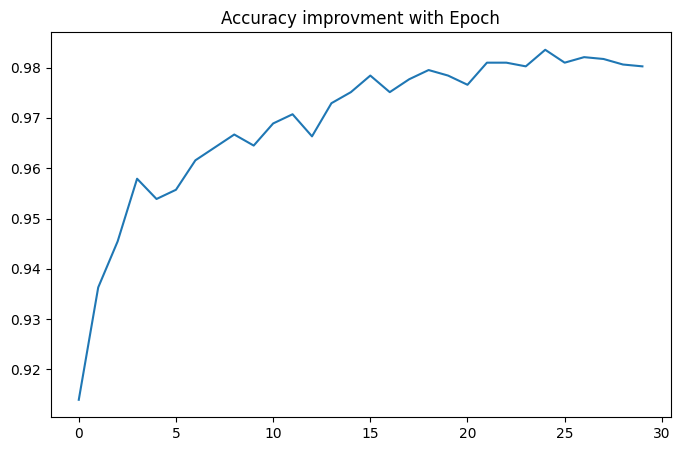


Evaluation against test Dataset :

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9711 - loss: 0.1790 


[0.1786292940378189, 0.9637002348899841]

In [10]:
import matplotlib.pyplot as plt
pd.DataFrame(history.history)['accuracy'].plot(figsize=(8,5))
plt.title("Accuracy improvment with Epoch")
plt.show()
print("\nEvaluation against test Dataset :\n")
model.evaluate(X_test, Y_test)

In [17]:
prediction_input = [[0,1,1,4100000, 12200000,8,417, 2700000, 2200000, 8800000, 3300000]]
scaled_input = scaler.transform(prediction_input)
prediction = model.predict(scaled_input)
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[[1.0265023e-08 1.0000000e+00]]


In [18]:
pred = np.argmax(prediction)
print("Pridiction is : ",lable_encoder_y.inverse_transform([pred]))

Pridiction is :  [' Rejected']
